# Features

Feature distributions for each subset.

In [18]:
import pickle, h5py, astropy.io.ascii as asc, numpy, matplotlib.pyplot as plt
%matplotlib inline

with open('/Users/alger/data/Crowdastro/sets_atlas.pkl', 'rb') as f:
    atlas_sets = pickle.load(f)
with open('/Users/alger/data/Crowdastro/sets_swire.pkl', 'rb') as f:
    swire_sets = pickle.load(f)
with h5py.File('/Users/alger/data/Crowdastro/swire.h5') as f:
    swire_features = f['features'].value
with h5py.File('/Users/alger/data/Crowdastro/crowdastro-swire.h5') as f:
    swire_names = [i.decode('ascii') for i in f['/swire/cdfs/string'].value]
    swire_coords = f['/swire/cdfs/numeric'][:, :2]
swire_labels = {i['swire']: i['norris_label'] for i in asc.read('/Users/alger/data/SWIRE/all_labels.csv')}
table = asc.read('/Users/alger/data/Crowdastro/one-table-to-rule-them-all.tbl')

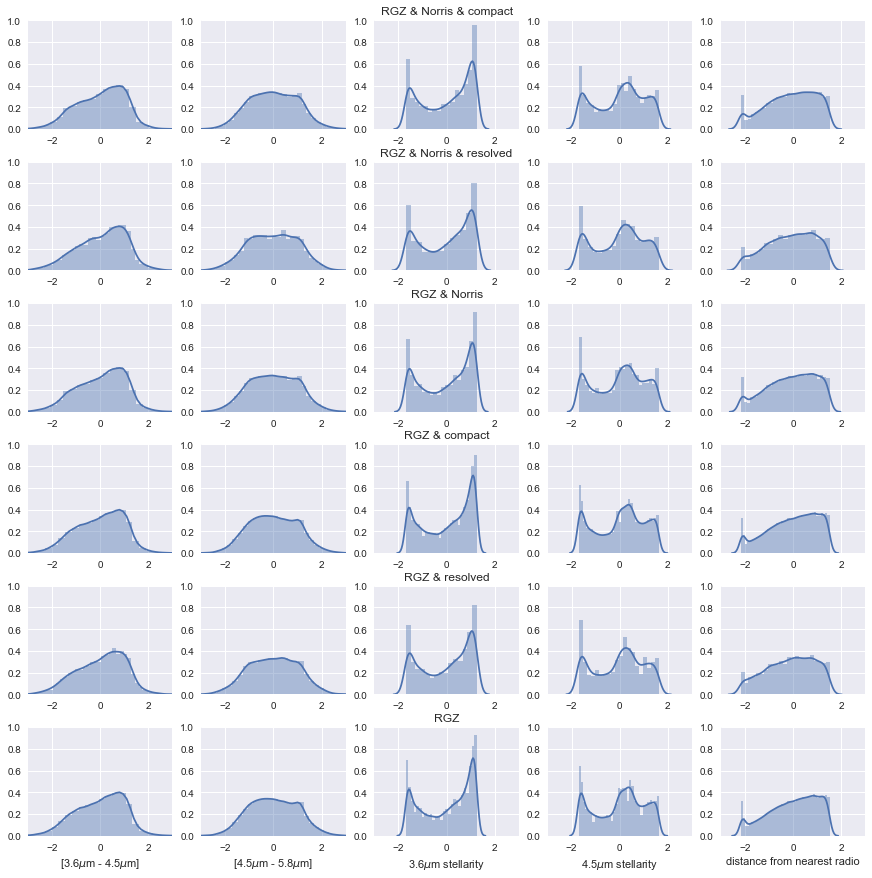

In [24]:
import seaborn

plt.figure(figsize=(15, 15))
for j, (subset_str, subset) in enumerate(swire_sets.items()):
    swire_indices = sorted(set(numpy.concatenate(numpy.array(subset).ravel())))
    features = swire_features[swire_indices]
    for i in range(5):
        plt.subplot(6, 5, i + 1 + j * 5)
        if i == 2:
            plt.title(subset_str)
        plt.xlim((-3, 3))
        plt.ylim((0, 1))
        if j == 5:
            plt.xlabel(['[3.6$\\mu$m - 4.5$\\mu$m]', '[4.5$\\mu$m - 5.8$\\mu$m]',
                        '3.6$\\mu$m stellarity', '4.5$\\mu$m stellarity',
                        'distance from nearest radio'][i])
        seaborn.distplot(features[:, i])
plt.subplots_adjust(hspace=0.3)
plt.show()
plt.savefig('/Users/alger/repos/crowdastro-projects/ATLAS-CDFS/distributions.pdf')

RGZ & Norris & compact


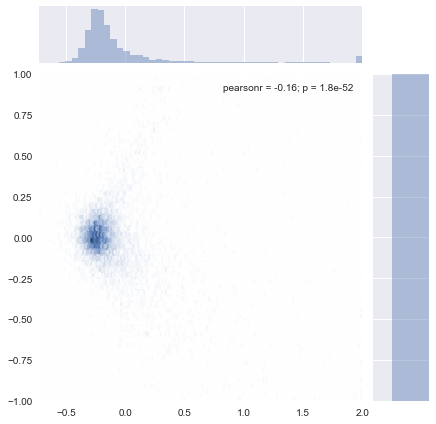

RGZ & Norris & resolved


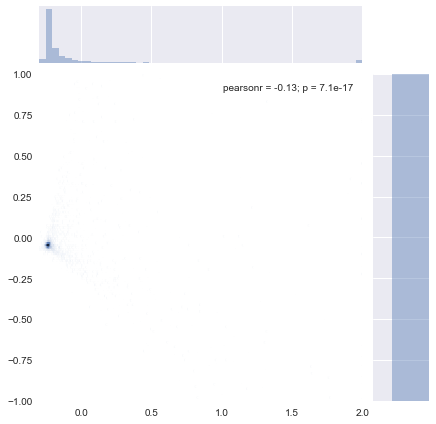

RGZ & Norris


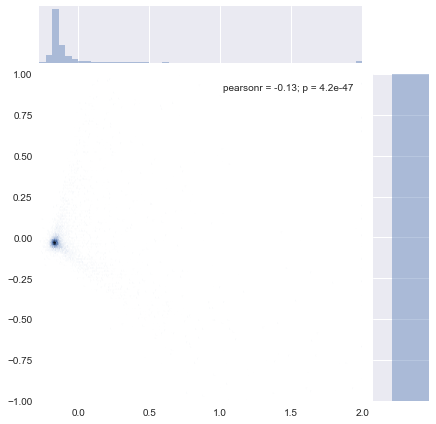

RGZ & compact


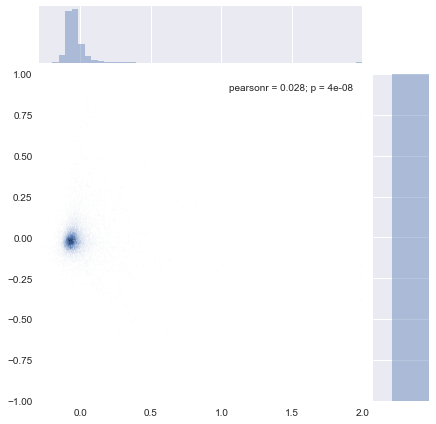

RGZ & resolved


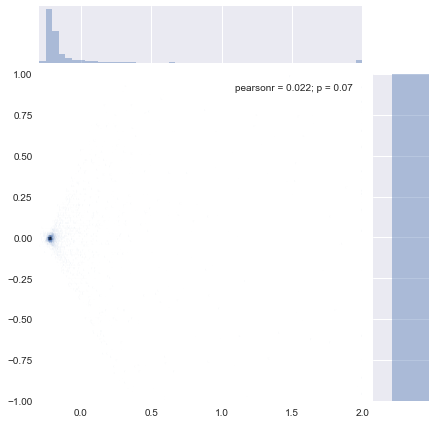

RGZ


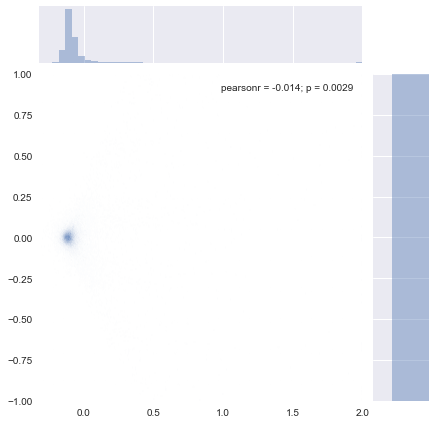

In [60]:
import sklearn.decomposition
for j, (subset_str, subset) in enumerate(swire_sets.items()):
    print(subset_str)
    swire_indices = sorted(set(numpy.concatenate(numpy.array(subset).ravel())))
    features = swire_features[swire_indices]
    im_features = features[:, 5:]
    pca = sklearn.decomposition.PCA(n_components=2, whiten=True)
    im_features = pca.fit_transform(im_features)
    im_features = numpy.clip(im_features, -2, 2)
    seaborn.jointplot(im_features[:, 0], im_features[:, 1], bins=100, kind='hex', )
    plt.xlim((-0.5, 1.0))
    plt.ylim((-1.0, 1.0))
    plt.show()